In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data/cognitive_data.csv')

data.head()

,Spectrum_hole,freq_in_Hz,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,Unnamed: 13
0,1,80000000.0,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,NaN
1,1,84200000.0,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,NaN
2,1,88300000.0,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,NaN
3,0,92500000.0,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,NaN
4,0,96700000.0,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,NaN


In [3]:
data['Spectrum_hole'].value_counts()

1    419
0     42
Name: Spectrum_hole, dtype: int64

In [4]:
data.shape

(461, 14)

### Problem definition

- Regression model to predict the frequency using power and spectrum.
- Classification model to predict whether it is spectrum or not.

In [5]:
data.head()

,Spectrum_hole,freq_in_Hz,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,Unnamed: 13
0,1,80000000.0,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,NaN
1,1,84200000.0,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,NaN
2,1,88300000.0,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,NaN
3,0,92500000.0,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,NaN
4,0,96700000.0,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,NaN


In [6]:
#drop the unnamed and spectrum_hole columns

reg_data = data.drop('Unnamed: 13', axis = 1)

In [7]:
#rearrange the columns
reg_data.columns.values

array(['Spectrum_hole', 'freq_in_Hz', 'power_1', 'power_2', 'power_3',
       'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9',
       'power_10', 'power_11'], dtype=object)

In [8]:
columns = ['Spectrum_hole','power_1', 'power_2', 'power_3', 'power_4',
       'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10',
       'power_11', 'freq_in_Hz']

reg_data = reg_data[columns]
reg_data.head()

,Spectrum_hole,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,freq_in_Hz
0,1,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,80000000.0
1,1,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,84200000.0
2,1,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,88300000.0
3,0,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,92500000.0
4,0,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,96700000.0


<AxesSubplot:ylabel='Frequency'>

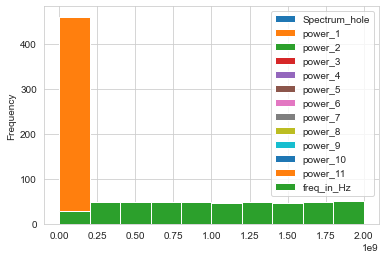

In [9]:
reg_data.plot(kind = 'hist')

In [10]:
df = reg_data.copy()

df.head()

,Spectrum_hole,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,freq_in_Hz
0,1,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,80000000.0
1,1,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,84200000.0
2,1,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,88300000.0
3,0,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,92500000.0
4,0,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,96700000.0


In [11]:
df.shape

(461, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Spectrum_hole  461 non-null    int64  
 1   power_1        461 non-null    float64
 2   power_2        461 non-null    float64
 3   power_3        461 non-null    float64
 4   power_4        461 non-null    float64
 5   power_5        461 non-null    float64
 6   power_6        461 non-null    float64
 7   power_7        461 non-null    float64
 8   power_8        461 non-null    float64
 9   power_9        461 non-null    float64
 10  power_10       461 non-null    float64
 11  power_11       461 non-null    float64
 12  freq_in_Hz     461 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 46.9 KB


In [13]:
df.describe()

,Spectrum_hole,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,freq_in_Hz
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,4.610000e+02
mean,0.908894,-113.576356,-113.761822,-113.875271,-113.842950,-113.827983,-113.171584,-113.222126,-112.933623,-112.983514,-112.727115,-112.667462,1.039995e+09
std,0.288073,11.947493,10.880240,10.845652,11.210501,11.000001,11.406598,11.216933,11.418220,11.353344,11.493513,11.686593,5.560486e+08
min,0.000000,-172.000000,-120.000000,-120.000000,-119.000000,-120.000000,-120.000000,-120.000000,-119.000000,-119.000000,-119.000000,-119.000000,8.000000e+07
25%,1.000000,-119.000000,-119.000000,-119.000000,-119.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,5.600000e+08
50%,1.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,-118.000000,1.040000e+09
75%,1.000000,-117.000000,-117.000000,-117.000000,-117.000000,-117.000000,-117.000000,-117.000000,-116.000000,-116.000000,-116.000000,-116.000000,1.520000e+09
max,1.000000,-47.100000,-53.900000,-52.200000,-39.800000,-49.900000,-48.100000,-52.500000,-53.400000,-53.900000,-51.400000,-40.900000,2.000000e+09


### check for missing values

In [14]:
df.isna().sum()

Spectrum_hole    0
power_1          0
power_2          0
power_3          0
power_4          0
power_5          0
power_6          0
power_7          0
power_8          0
power_9          0
power_10         0
power_11         0
freq_in_Hz       0
dtype: int64

### Reordering columns

In [15]:
columns = ['power_1', 'power_2', 'power_3', 'power_4',
       'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10',
       'power_11', 'freq_in_Hz', 'Spectrum_hole']
df = data[columns]
df.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,freq_in_Hz,Spectrum_hole
0,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,80000000.0,1
1,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,84200000.0,1
2,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,88300000.0,1
3,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,92500000.0,0
4,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,96700000.0,0


### Target

In [16]:
df['Spectrum_hole'].value_counts()

1    419
0     42
Name: Spectrum_hole, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
X.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,freq_in_Hz
0,-107.0,-106.0,-108.0,-109.0,-108.0,-104.0,-107.0,-106.0,-108.0,-104.0,-104.0,80000000.0
1,-107.0,-106.0,-105.0,-107.0,-105.0,-114.0,-105.0,-108.0,-106.0,-108.0,-104.0,84200000.0
2,-47.1,-53.9,-52.2,-39.8,-49.9,-48.1,-52.5,-53.4,-53.9,-51.4,-40.9,88300000.0
3,-65.7,-77.6,-71.7,-73.8,-71.9,-67.9,-77.8,-66.7,-69.7,-65.9,-70.2,92500000.0
4,-90.8,-85.9,-88.5,-88.5,-88.7,-98.7,-101.0,-96.9,-96.6,-96.3,-98.8,96700000.0


In [20]:
counter = Counter(y)
print(counter)

Counter({1: 419, 0: 42})


In [21]:
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({1: 419, 0: 419})


### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:10]

array([[-2.41562424e-01, -8.89388560e-02, -1.91055591e-01,
        -2.61861153e-01, -2.00911856e-01, -1.21984823e-01,
        -3.04440634e-01, -2.60593228e-01, -3.82288009e-01,
        -1.54998634e-01, -1.36101684e-01, -1.46202925e+00],
       [-2.41562424e-01, -8.89388560e-02,  6.38364426e-04,
        -1.37845503e-01, -1.39530477e-02, -7.40341418e-01,
        -1.80116697e-01, -3.85083485e-01, -2.58139236e-01,
        -4.00909426e-01, -1.36101684e-01, -1.45381990e+00],
       [ 3.18484953e+00,  3.20298533e+00,  3.37445198e+00,
         4.02908033e+00,  3.41985706e+00,  3.33462855e+00,
         3.08338663e+00,  3.01350054e+00,  2.97593631e+00,
         3.07872827e+00,  3.80290490e+00, -1.44580600e+00],
       [ 2.12088855e+00,  1.70550734e+00,  2.12844127e+00,
         1.92081428e+00,  2.04882580e+00,  2.11028249e+00,
         1.51068883e+00,  2.18564033e+00,  1.99516100e+00,
         2.18730165e+00,  1.97385747e+00, -1.43759665e+00],
       [ 6.85113261e-01,  1.18107412e+00,  1.0549551

### Modeling and Evaluation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
clf = LogisticRegression()

In [27]:
y.unique()

array([1, 0])

In [28]:
clf.fit(X_train, y_train)

LogisticRegression()

In [29]:
clf.score(X_test, y_test)

0.9345238095238095

In [30]:
clf.score(X_train, y_train)

0.9686567164179104

In [31]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

### Regression model

In [32]:
df.columns.values

array(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11',
       'freq_in_Hz', 'Spectrum_hole'], dtype=object)

In [33]:
columns = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11',
       'freq_in_Hz']

df_reg = df[columns]

### Feature Scaling

In [34]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state=42)

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
lin_reg.score(X_test, y_test)

0.5121486157450708

In [39]:
lin_reg.score(X_train, y_train)

0.5650845315300295

### Regularization of Regression model using LassoCV and RidgeCV

In [40]:
from sklearn.linear_model import LassoCV, RidgeCV

In [41]:
lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV()

In [42]:
lasso.score(X_test, y_test)

0.5242537649841578

In [43]:
lasso.score(X_train, y_train)

0.5640415191710589

In [44]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.5720369849117442

In [45]:
ridge.score(X_train, y_train)

0.5487889647928301